<a href="https://colab.research.google.com/github/snmkrhn/Kuantum-Destekli-Drone-ile-Trafik-Kazas-Analizi-ve-Acil-M-dahale/blob/main/kaza_analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Kaggle API anahtarını yükle
files.upload()  # kaggle.json dosyasını buradan yükle


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"sinemkarahan","key":"c05ed85ae61e840d2d0b6676da7c1377"}'}

In [3]:
# Kaggle kütüphanesini yükle
!pip install kaggle

# Kaggle API anahtarını doğru konuma taşı
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Traffic-Net Dataset'i indir
!kaggle datasets download -d umairshahpirzada/traffic-net

# Zip dosyasını aç
!unzip traffic-net.zip -d traffic-net


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/umairshahpirzada/traffic-net
License(s): unknown
traffic-net.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-net.zip
  inflating: traffic-net/trafficnet_dataset_v1/test/accident/images (2).jpg  
  inflating: traffic-net/trafficnet_dataset_v1/test/accident/images.jpg  
  inflating: traffic-net/trafficnet_dataset_v1/test/accident/images_002 (2).jpg  
  inflating: traffic-net/trafficnet_dataset_v1/test/accident/images_002.jpg  
  inflating: traffic-net/trafficnet_dataset_v1/test/accident/images_003.jpg  
  inflating: traffic-net/trafficnet_dataset_v1/test/accident/images_004 (2).jpg  
  inflating: traffic-net/trafficnet_dataset_v1/test/accident/images_004.jpg  
  inflating: traffic-net/trafficnet_dataset_v1/test/accident/images_005 (2).jpg  
  inflating: tra

In [4]:
# Kaggle veri setini indir
!kaggle datasets download -d umairshahpirzada/traffic-net

# İndirilen dosyanın var olup olmadığını kontrol et
!ls


Dataset URL: https://www.kaggle.com/datasets/umairshahpirzada/traffic-net
License(s): unknown
traffic-net.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_data  traffic-net  traffic-net.zip


In [5]:
import os

# Ana klasörü listele
base_dir = "traffic-net"
print("Ana Klasör:", os.listdir(base_dir))

# Eğer 'Traffic-Net' klasörü varsa içine gir ve içeriğini listele
data_dir = os.path.join(base_dir, "Traffic-Net")
if os.path.exists(data_dir):
    print("Traffic-Net Klasörü İçeriği:", os.listdir(data_dir))
else:
    print("Traffic-Net klasörü bulunamadı! Doğru dosya yolunu kontrol et.")


Ana Klasör: ['trafficnet_dataset_v1']
Traffic-Net klasörü bulunamadı! Doğru dosya yolunu kontrol et.


In [16]:
import os

# Eğitim veri setindeki dosya yapısını kontrol et
train_dir = "traffic-net/trafficnet_dataset_v1/train"
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        print(f"Kategori: {category} → Dosyalar: {os.listdir(category_path)}")


Kategori: dense_traffic → Dosyalar: ['images_590.jpg', 'images_389 (2).jpg', 'images_329.jpg', 'images_245.jpg', 'images_643 (2).jpg', 'images_326.jpg', 'images_429.jpg', 'images_440.jpg', 'images_666.jpg', 'images_461 (4).jpg', 'images_448.jpg', 'images_303 (4).jpg', 'images_710.jpg', 'images_264.jpg', 'images_362 (2).jpg', 'images_231 (2).jpg', 'images_461.jpg', 'images_670.jpg', 'images_663 (2).jpg', 'images_617.jpg', 'images_367 (3).jpg', 'images_402 (3).jpg', 'images_711.jpg', 'images_349.jpg', 'images_540 (2).jpg', 'images_502 (3).jpg', 'images_645 (2).jpg', 'images_360 (3).jpg', 'images_244.jpg', 'images_529.jpg', 'images_430.jpg', 'images_401 (2).jpg', 'images_617 (2).jpg', 'images_702 (2).jpg', 'images_663.jpg', 'images_447.jpg', 'images_520.jpg', 'images_491.jpg', 'images_269 (2).jpg', 'images_671.jpg', 'images_642 (3).jpg', 'images_367 (2).jpg', 'images_560 (3).jpg', 'images_427.jpg', 'images_317.jpg', 'images_485.jpg', 'images_661.jpg', 'images_260.jpg', 'images_407 (2).jpg

In [17]:
!pip install tensorflow


In [21]:
import os

# "/content" altındaki tüm klasörleri listeleyelim
for root, dirs, files in os.walk("/content"):
    print(root)


/content
/content/.config
/content/.config/configurations
/content/.config/logs
/content/.config/logs/2025.02.26
/content/traffic-net
/content/traffic-net/trafficnet_dataset_v1
/content/traffic-net/trafficnet_dataset_v1/train
/content/traffic-net/trafficnet_dataset_v1/train/dense_traffic
/content/traffic-net/trafficnet_dataset_v1/train/sparse_traffic
/content/traffic-net/trafficnet_dataset_v1/train/accident
/content/traffic-net/trafficnet_dataset_v1/train/fire
/content/traffic-net/trafficnet_dataset_v1/test
/content/traffic-net/trafficnet_dataset_v1/test/dense_traffic
/content/traffic-net/trafficnet_dataset_v1/test/sparse_traffic
/content/traffic-net/trafficnet_dataset_v1/test/accident
/content/traffic-net/trafficnet_dataset_v1/test/fire
/content/sample_data


In [22]:
import os

# Doğru veri seti yolu
dataset_path = "/content/traffic-net/trafficnet_dataset_v1/train"

# Alt klasörleri listeleyelim
categories = os.listdir(dataset_path)
print("Veri setindeki kategoriler:", categories)

# Örnek bir kategori seçelim (örneğin 'accident')
accident_path = os.path.join(dataset_path, "accident")

# O klasördeki tüm görselleri listeleyelim
image_files = [f for f in os.listdir(accident_path) if f.endswith(".jpg")]

# Kaç tane görsel olduğunu görelim
print(f"'accident' kategorisinde toplam {len(image_files)} görüntü var.")


Veri setindeki kategoriler: ['dense_traffic', 'sparse_traffic', 'accident', 'fire']
'accident' kategorisinde toplam 900 görüntü var.


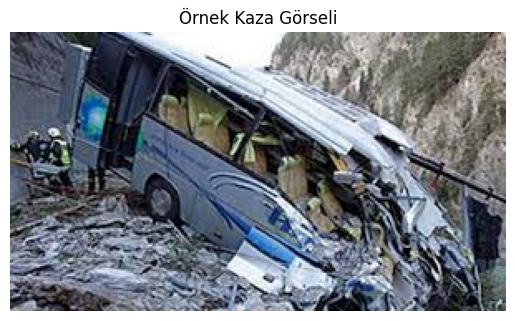

In [23]:
import cv2
import matplotlib.pyplot as plt

# İlk görseli oku ve göster
sample_image_path = os.path.join(accident_path, image_files[0])
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

plt.imshow(sample_image)
plt.axis("off")
plt.title("Örnek Kaza Görseli")
plt.show()


In [24]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [25]:
from ultralytics import YOLO

# YOLOv8 modelini yükle (Önceden eğitilmiş genel nesne tespit modeli)
model = YOLO("yolov8n.pt")  # Küçük ve hızlı model, gerekirse "yolov8s.pt" de kullanabilirsin.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 72.6MB/s]



image 1/1 /content/traffic-net/trafficnet_dataset_v1/train/accident/images_464.jpg: 384x640 1 bus, 364.3ms
Speed: 16.3ms preprocess, 364.3ms inference, 34.8ms postprocess per image at shape (1, 3, 384, 640)


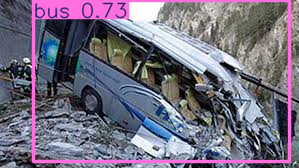

In [26]:
# Örnek bir kaza görüntüsünü analiz edelim
results = model(sample_image_path)  # YOLO modelini çalıştır

# Sonucu görselleştir
from PIL import Image

for r in results:
    r.show()  # Modelin tespit ettiği nesneleri göster


In [27]:
import pandas as pd

# YOLO modelinin çıkardığı tahminleri al
results_list = []

for result in results:
    for box in result.boxes.data:  # Algılanan nesneler
        x1, y1, x2, y2, conf, cls = box.tolist()
        label = result.names[int(cls)]  # Nesne sınıfı (örneğin 'car', 'person')
        results_list.append([label, conf, x1, y1, x2, y2])

# Sonuçları tablo olarak gösterelim
df = pd.DataFrame(results_list, columns=["Nesne", "Güven Skoru", "x1", "y1", "x2", "y2"])
print(df)


  Nesne  Güven Skoru         x1        y1          x2          y2
0   bus     0.731381  33.916233  0.637222  289.172333  161.686142


In [28]:
# Kazaya karışan nesneleri sayalım
num_buses = len(df[df["Nesne"] == "bus"])
num_cars = len(df[df["Nesne"] == "car"])
num_trucks = len(df[df["Nesne"] == "truck"])
num_persons = len(df[df["Nesne"] == "person"])

print(f"Otobüs Sayısı: {num_buses}")
print(f"Araba Sayısı: {num_cars}")
print(f"Kamyon Sayısı: {num_trucks}")
print(f"İnsan Sayısı: {num_persons}")


Otobüs Sayısı: 1
Araba Sayısı: 0
Kamyon Sayısı: 0
İnsan Sayısı: 0


In [29]:
# Kazanın şiddetini belirle
if num_buses >= 1 and num_cars >= 2:
    severity = "🚨 Yüksek Şiddetli Kaza"
elif num_cars >= 2:
    severity = "⚠️ Orta Şiddetli Kaza"
else:
    severity = "✅ Hafif Kaza"

print(f"Kazanın Şiddeti: {severity}")


Kazanın Şiddeti: ✅ Hafif Kaza



0: 384x640 7 persons, 4 cars, 1 truck, 162.8ms
Speed: 6.4ms preprocess, 162.8ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)


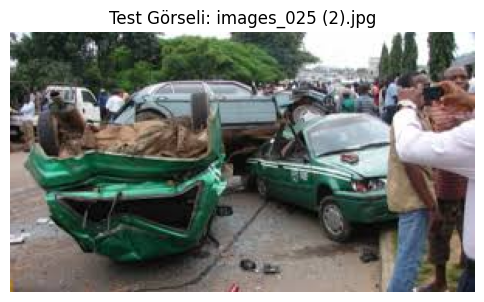

Nesne: person, Güven Skoru: 0.72, Koordinatlar: (241.64398193359375, 26.486948013305664), (276.5445861816406, 166.44029235839844)
Nesne: car, Güven Skoru: 0.69, Koordinatlar: (152.55145263671875, 49.65758514404297), (250.26791381835938, 135.92486572265625)
Nesne: car, Güven Skoru: 0.61, Koordinatlar: (64.6021499633789, 31.618465423583984), (159.38577270507812, 62.077598571777344)
Nesne: person, Güven Skoru: 0.58, Koordinatlar: (245.31410217285156, 26.0535888671875), (299.9379577636719, 165.83627319335938)
Nesne: person, Güven Skoru: 0.56, Koordinatlar: (239.85626220703125, 30.394176483154297), (250.78512573242188, 59.90186309814453)
Nesne: person, Güven Skoru: 0.53, Koordinatlar: (61.872802734375, 36.72856521606445), (75.0731201171875, 58.51220703125)
Nesne: person, Güven Skoru: 0.44, Koordinatlar: (56.19056701660156, 37.065765380859375), (63.82115936279297, 58.035118103027344)
Nesne: car, Güven Skoru: 0.41, Koordinatlar: (19.970304489135742, 34.5306282043457), (58.83501052856445, 61.5

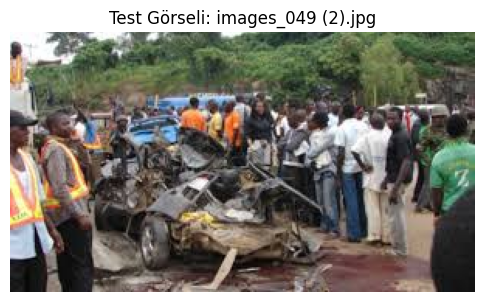

Nesne: person, Güven Skoru: 0.86, Koordinatlar: (269.7309265136719, 52.7655143737793), (299.8868713378906, 165.82504272460938)
Nesne: person, Güven Skoru: 0.81, Koordinatlar: (0.0, 35.95318603515625), (35.988590240478516, 165.95294189453125)
Nesne: person, Güven Skoru: 0.76, Koordinatlar: (18.120357513427734, 50.57005310058594), (55.46401596069336, 165.86732482910156)
Nesne: person, Güven Skoru: 0.69, Koordinatlar: (219.6685333251953, 51.289573669433594), (245.1282501220703, 138.1067352294922)
Nesne: person, Güven Skoru: 0.62, Koordinatlar: (188.69781494140625, 50.023197174072266), (214.46864318847656, 132.75608825683594)
Nesne: person, Güven Skoru: 0.60, Koordinatlar: (239.47425842285156, 50.20797348022461), (260.7366943359375, 143.78330993652344)
Nesne: person, Güven Skoru: 0.54, Koordinatlar: (208.86842346191406, 45.318443298339844), (231.87774658203125, 136.39698791503906)
Nesne: person, Güven Skoru: 0.47, Koordinatlar: (137.09481811523438, 44.2724494934082), (150.28086853027344, 8

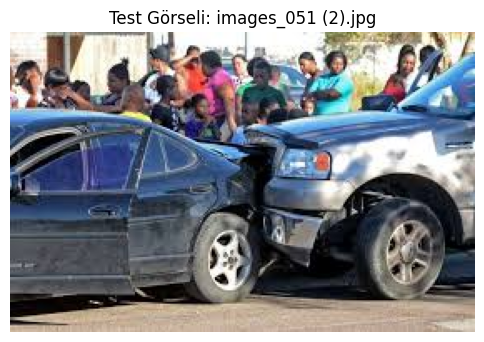

Nesne: person, Güven Skoru: 0.81, Koordinatlar: (175.49501037597656, 11.546758651733398), (206.6455078125, 50.3099479675293)
Nesne: person, Güven Skoru: 0.64, Koordinatlar: (135.6868896484375, 15.266128540039062), (166.34121704101562, 56.099185943603516)
Nesne: person, Güven Skoru: 0.52, Koordinatlar: (113.32139587402344, 11.089299201965332), (136.8829803466797, 65.04910278320312)
Nesne: person, Güven Skoru: 0.52, Koordinatlar: (0.715959906578064, 16.82309913635254), (19.980066299438477, 46.50662612915039)
Nesne: person, Güven Skoru: 0.52, Koordinatlar: (223.50086975097656, 7.569770812988281), (244.364501953125, 40.86231231689453)
Nesne: person, Güven Skoru: 0.50, Koordinatlar: (14.896953582763672, 21.31283950805664), (51.42862319946289, 47.64273452758789)
Nesne: person, Güven Skoru: 0.45, Koordinatlar: (104.02914428710938, 36.61101150512695), (125.70120239257812, 65.28446960449219)
Nesne: car, Güven Skoru: 0.43, Koordinatlar: (0.25788000226020813, 39.96067810058594), (277.389434814453

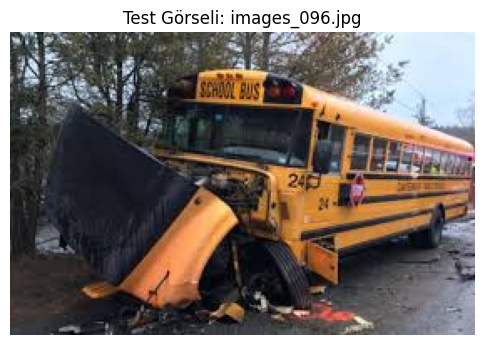

Nesne: bus, Güven Skoru: 0.45, Koordinatlar: (49.826499938964844, 21.440662384033203), (272.5868225097656, 170.66830444335938)
Nesne: person, Güven Skoru: 0.35, Koordinatlar: (203.37107849121094, 82.97637176513672), (212.70928955078125, 104.28329467773438)

0: 448x640 1 bus, 342.8ms
Speed: 7.6ms preprocess, 342.8ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


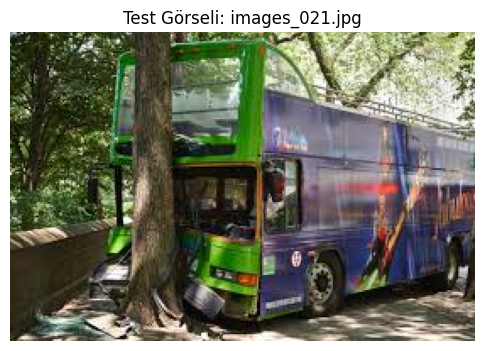

Nesne: bus, Güven Skoru: 0.66, Koordinatlar: (54.45480728149414, 4.869796276092529), (270.9246520996094, 173.791259765625)


In [31]:
import os
import random
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Modeli yükle
model = YOLO("yolov8n.pt")

# Test için kaza görüntülerini seçelim
test_path = "/content/traffic-net/trafficnet_dataset_v1/test/accident"
test_images = os.listdir(test_path)

# Rastgele 5 test görüntüsü seçelim
random_images = random.sample(test_images, 5)

for img_file in random_images:
    img_path = os.path.join(test_path, img_file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # YOLOv8 ile analiz yap
    results = model(img)

    # Sonuçları görselleştirelim
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"Test Görseli: {img_file}")
    plt.show()

    # Modelin nesne tespitlerini yazdır (Güncellenmiş yöntem)
    detections = results[0].boxes.data.tolist()  # Güncelleme burada
    for det in detections:
        x1, y1, x2, y2, conf, cls = det
        print(f"Nesne: {model.names[int(cls)]}, Güven Skoru: {conf:.2f}, Koordinatlar: ({x1}, {y1}), ({x2}, {y2})")


In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
import torch
from ultralytics import YOLO

# Modeli yükle
model = YOLO("yolov8n.pt")  # Küçük model ile başlıyoruz

# Test görüntüsü
img_path = "test.jpg"

# Modeli çalıştır (Güven eşiği 0.6 yaptık)
results = model(img_path, conf=0.6)

# Sonuçları göster
results.show()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 53.3MB/s]


FileNotFoundError: test.jpg does not exist

In [5]:
from ultralytics import YOLO

# Modeli yükle
model = YOLO("yolov8n.pt")  # Küçük modelle başlıyoruz

# Modeli test et (örnek bir görüntüyle)
model("https://ultralytics.com/images/zidane.jpg", show=True)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()




100%|██████████| 49.2k/49.2k [00:00<00:00, 3.77MB/s]


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 345.6ms
Speed: 18.8ms preprocess, 345.6ms inference, 30.8ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [6]:
from ultralytics import YOLO

# Modeli yükle
model = YOLO("yolov8n.pt")  # Küçük modelle başlıyoruz

# Hiperparametre optimizasyonu
model.tune(data="dataset.yaml", epochs=50, iterations=300)


100%|██████████| 6.25M/6.25M [00:00<00:00, 51.2MB/s]


Görüntülenen çıkış son 5000 satıra kısaltıldı.
perspective: 0.0
flipud: 0.0
fliplr: 0.5
bgr: 0.0
mosaic: 1.0
mixup: 0.0
copy_paste: 0.0

Tuner: Starting iteration 173/300 with hyperparameters: {'lr0': 0.01731, 'lrf': 0.00727, 'momentum': 0.94404, 'weight_decay': 0.00082, 'warmup_epochs': 4.61025, 'warmup_momentum': 0.75913, 'box': 12.07271, 'cls': 0.41141, 'dfl': 1.19656, 'hsv_h': 0.02115, 'hsv_s': 0.67181, 'hsv_v': 0.43594, 'degrees': 0.0, 'translate': 0.09849, 'scale': 0.52315, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.33725, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
WARNING ❌️ training failure for hyperparameter tuning iteration 173
Command 'yolo train task=detect mode=train model=yolov8n.pt data=dataset.yaml epochs=50 time=None patience=100 batch=16 imgsz=640 save=True save_period=-1 cache=False device=None workers=8 project=None name=None exist_ok=False pretrained=True optimizer=auto verbose=True seed=0 deterministic=True single_cls=False rect=